In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
import itertools as its
import operator
from hotstepper.mixins.operations import apply_math_function
from hotstepper.utilities.helpers import get_clean_step_data
from hotstepper.utilities.helpers import prepare_input,get_value,prepare_datetime,get_dt
from datetime import datetime, timedelta
import staircase as sc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

#vsteps = Steps.read_dataframe(df.head(175),'enter','leave')
vsteps = Steps(use_datetime=True).add_direct(df.enter,df.leave)
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)


In [3]:

# sata = vsteps._all_data
# mask = np.where(sata[:,2]>9, True,False)
# groups = [(group[0],group[-1]) for group in (list(group) for key, group in its.groupby(range(len(mask)), key=mask.__getitem__) if key)]
#groups

<AxesSubplot:>

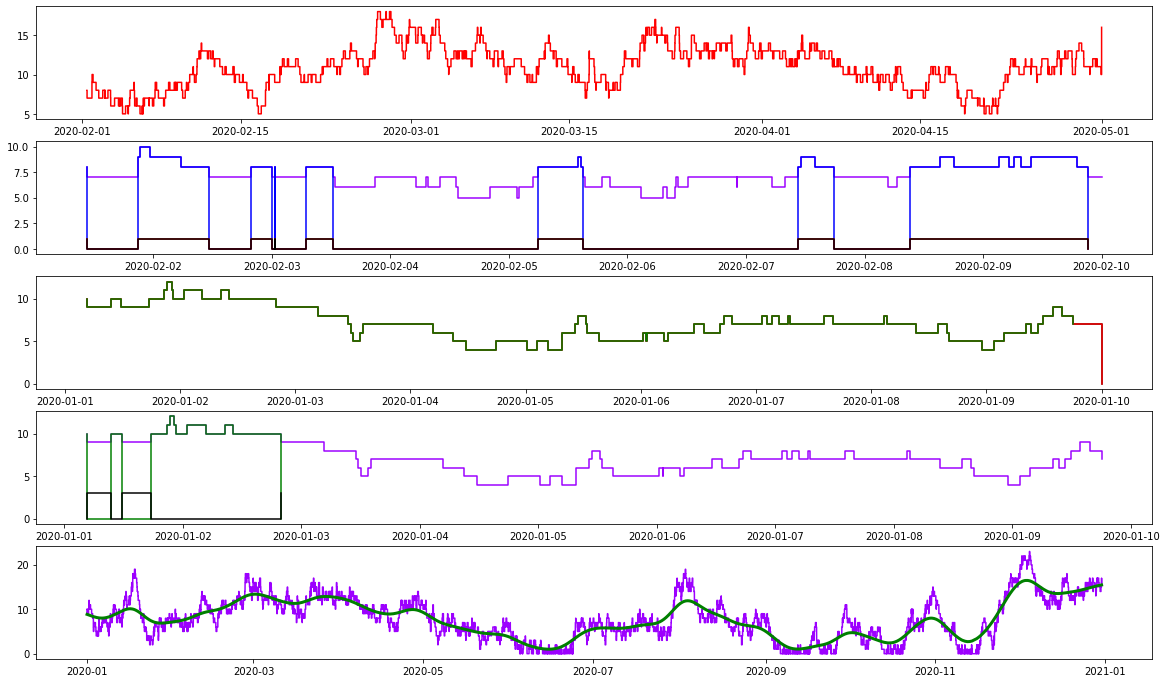

In [4]:
#tbase = Basis(Basis.tanh,52416)

#p = np.arange(pd.Timestamp(2020,1,31), pd.Timestamp(2020,2,4), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
#px = [x.timestamp() for x in p]
fig,ax = plt.subplots(nrows=5,figsize=(20,12))

#vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,3)).plot(ax=ax[0])
v_ul_clip = vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,10))
#v_ul_clip._start = Utils.ts_to_dt(v_ul_clip._all_keys[1])
#print(v_ul_clip._start)
v_ul_clip.plot(ax=ax[1])
#v_ul_clip.normalise().plot(ax=ax[1],color='r')
(v_ul_clip>=8).plot(ax=ax[1],color='blue')

((v_ul_clip>=8)/v_ul_clip).plot(ax=ax[1],color='red')
(v_ul_clip>=8).normalise().plot(ax=ax[1],color='black')
#v_ul_clip.smooth_plot(ax=ax[1],color='g')


#first_step_full = (vsteps.steps())[0]
#(v_ul_clip.steps())[0].plot(ax=ax[0],color='blue')
#ax[0].step(p,first_step(p),color='blue')
#ax[0].step(p,(v_ul_clip<<timedelta(minutes=660))(p),color='g')

#queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).plot(ax[0])

#queue.clip(upper=pd.Timestamp(2020,1,12)).plot(ax[1])
# vclip2 = vsteps.clip(ubound=pd.Timestamp(2020,2,8))
# vclip2.plot(ax=ax[1])
# queue.clip(upper=pd.Timestamp(2020,2,8)).plot(ax=ax[1])

# vclip2.normalise().plot(ax=ax[1],color='g')


vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,5,1)).plot(ax=ax[0],color='r')
#vsteps.clip(lbound=pd.Timestamp(2020,2,1)).smooth_plot(ax=ax[0],color='g',linewidth=4)
#queue.clip(upper=pd.Timestamp(2020,2,1)).plot(ax[0])

#clip_step = Step(start=pd.Timestamp(2020,3,1),end=pd.Timestamp(2020,6,1))
clip_step_end = Steps(end=pd.Timestamp(2020,1,10))
steps_end = Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = Steps(start=pd.Timestamp(2020,5,1))

#queue.plot(ax=ax[2])
#vsteps.plot(ax=ax[2])
#((vsteps*clip_step_end)).plot(ax=ax[2],color='r')
#(vsteps-(vsteps*clip_step_start)).plot(ax=ax[2],color='g')
#(vsteps-(vsteps*clip_step_end)).plot(ax=ax[2],color='r')
#res = apply_aggregate(vsteps,np.subtract,(vsteps*clip_step_end))
#res.plot(ax=ax[2],color='r')
(vsteps*clip_step_end).plot(ax=ax[2],color='black')
(vsteps*steps_end).plot(ax=ax[2],color='r')
vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(ax=ax[2],color='g')


#(vsteps*clip_step).plot(ax=ax[2],color='g')
vsteps.plot(ax=ax[4])
vsteps.smooth_plot(ax=ax[4],color='g',linewidth=3)
#(vsteps).smooth_plot(ax=ax[3],color='r')
#(vsteps>>pd.Timedelta(hours=11)).plot(method='function',ax=ax[3],color='g')
#vstep_clean = vsteps.clip(ubound=pd.Timestamp(2020,2,12,1,42))
vc = vsteps.clip(ubound=pd.Timestamp(2020,1,10))
vc.plot(ax=ax[3])
vc7 = vc>9
vc7.plot(ax=ax[3],color='g')
#vc7.normalise(3).plot(ax=ax[3],color='r')
vc7.invert(3).plot(ax=ax[3],color='black')
#(vc7<<pd.Timedelta(minutes=660)).invert(3).plot(ax=ax[3],color='blue')
#vsteps._operate_value_new(10, operator.ge).plot(ax=ax[3],color='orange')

# vsteps.clip(ubound=pd.Timestamp(2020,1,12)).plot(ax=ax[3])
# ((vsteps.clip(ubound=pd.Timestamp(2020,1,12))>10)).plot(ax=ax[3],color='g')
#+Step(weight=10,use_datetime=True)
#print((v_ul_clip<<timedelta(minutes=660))(datetime(2020,2,1,6,0)))
#ax[2].step(np.arange(len(vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])),vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])

# print(queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(lower=pd.Timestamp(2020,2,1)).mean())
# print(vsteps.clip(lbound=pd.Timestamp(2020,2,1)).mean())
#Utils.prepare_datetime(k[2])


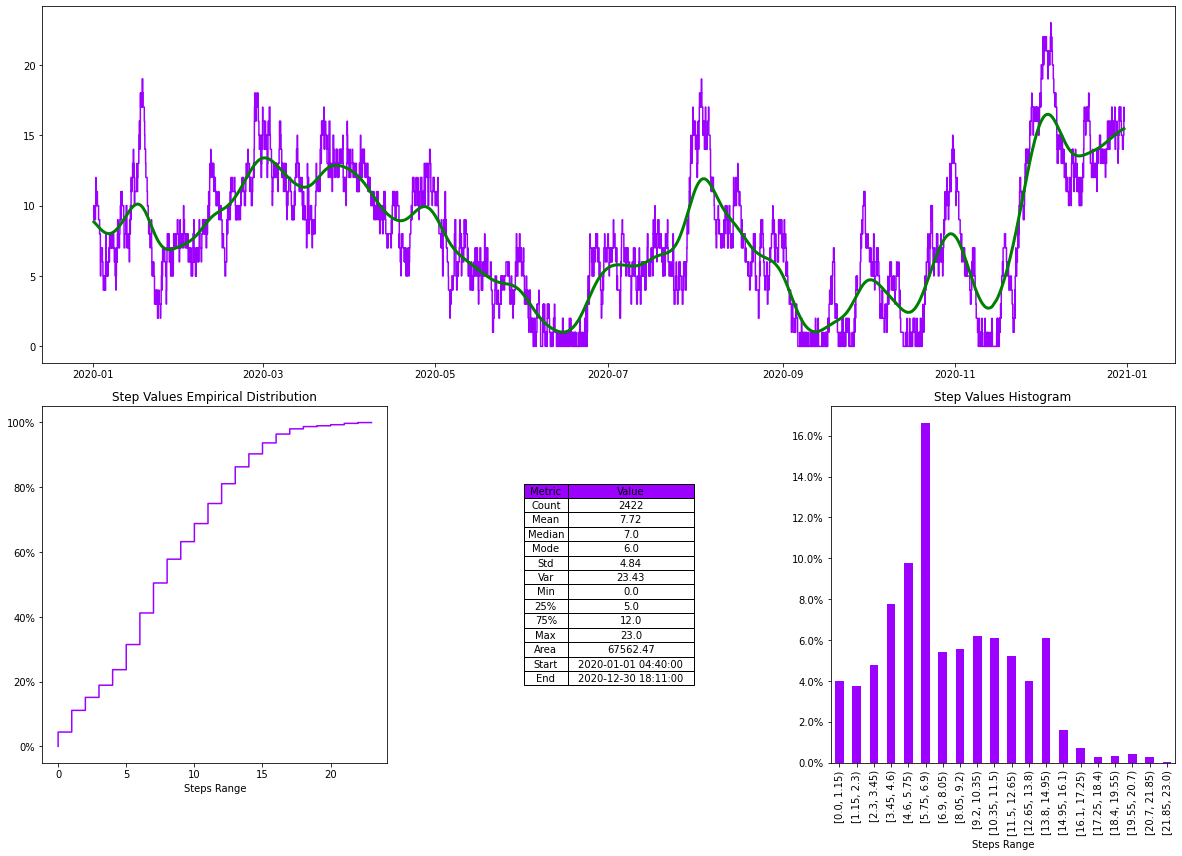

In [5]:
vsteps.summary();

2567.9333333333334 2554.0


False

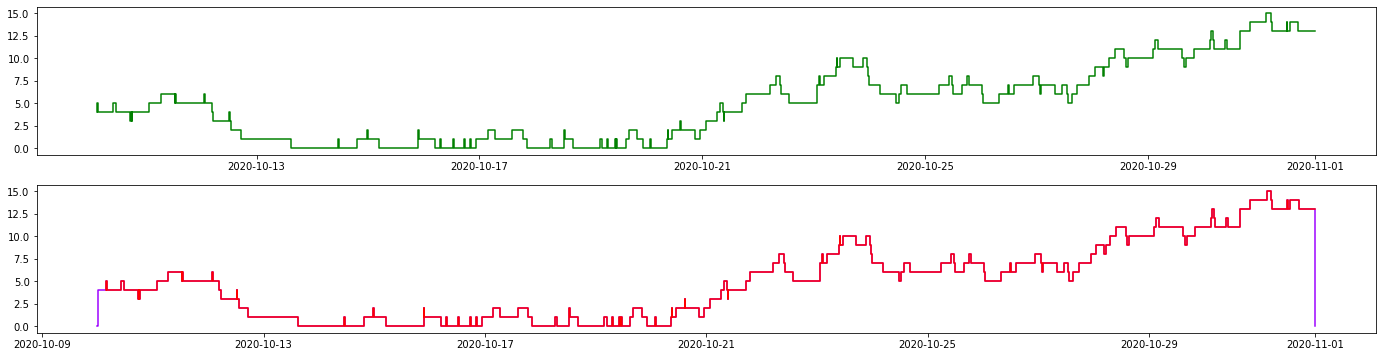

In [6]:
fig, (ax,ax1) = plt.subplots(nrows=2,figsize=(24,6))
#vc = (vsteps*clip_step_end)
#vc.plot(ax=ax,color='black')
cc = vsteps.clip(lbound=pd.Timestamp(2020,10,10),ubound=pd.Timestamp(2020,11,1))
cc.plot(ax=ax,color='g')

cl = vsteps.clamp(lbound=pd.Timestamp(2020,10,10),ubound=pd.Timestamp(2020,11,1))


cl.plot(ax=ax1)
cc.plot(ax=ax1,color='r')
#lines.get_ydata(orig=False)
#plt.fill_between(ax.get_children()[0].get_xdata(), 0, ax.get_children()[0].get_ydata(),where='steps')
#plt.show()
#vc==cc
print(cl.integrate(),cc.integrate())
cl.compare(cc)

<AxesSubplot:>

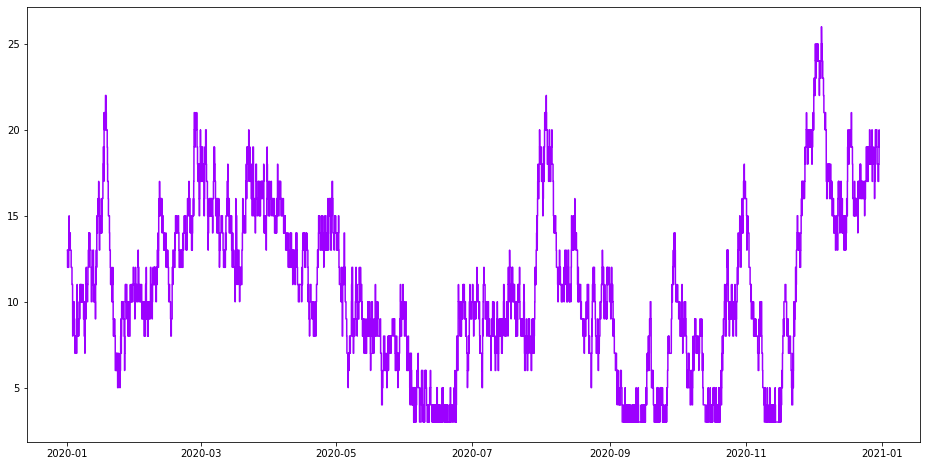

In [14]:
vc = vsteps.clip(ubound=pd.Timestamp(2020,1,10))
#const = Steps(weight=3)
#const = Steps(False).add_direct([None],[None],[3])

vc_const = vsteps+3
vc_const.plot()
#print(const.first(),const.last())

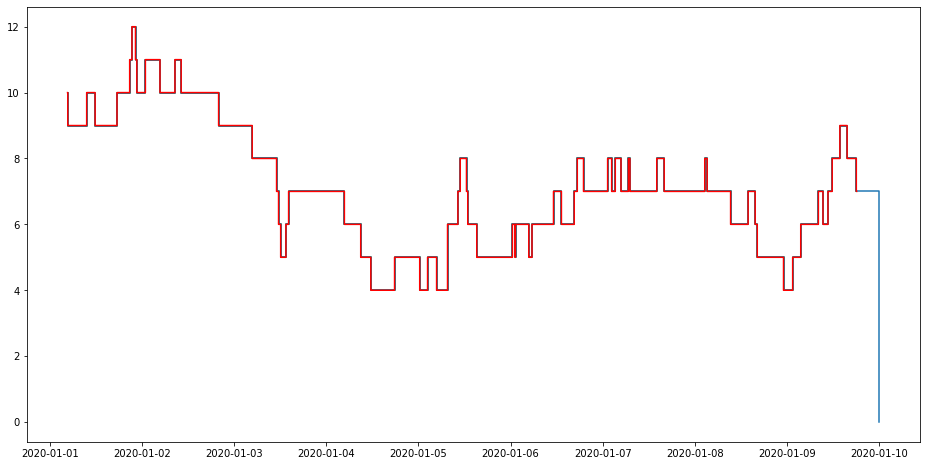

In [8]:
vc = vsteps.clip(ubound=pd.Timestamp(2020,1,10))
p = np.arange(vc.first()-pd.Timedelta(minutes=5),vc.last()+pd.Timedelta(minutes=5),pd.Timedelta(minutes=1)).astype(pd.Timestamp)
ax = vc.plot(color='g')
queue.clip(upper=pd.Timestamp(2020,1,10)).plot(ax=ax)
ax.step(p,vc.step(p),color='r')


<AxesSubplot:>

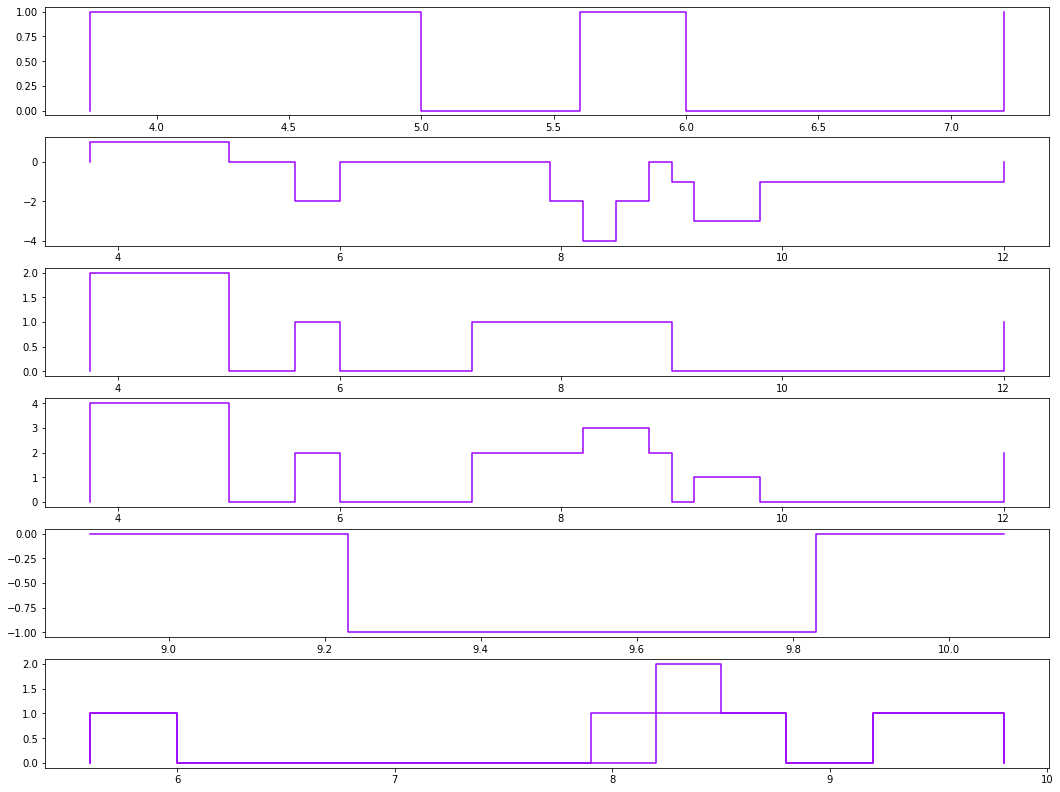

In [9]:

#mbase = np.frompyfunc(mybase2,1,1)
#tbase = Basis(Basis.sigmoid,5)


x = Step(3.75,5)
y = Step(5.6,6)
y2 = Step(8.2,8.8)
y3 = Step(9.2,9.8)

#y3.rebase()
z = Step(7.2)
q = Step(12)

p = Step(9,weight=-1)
p1 = Step(9.5,weight=-1)

ss1 = Steps()
ss1 = ss1.add([z,x,y])

ss2 = Steps()
ss2 = ss2.add([q,x,p])
ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

y4 = y2 << 0.3
ss3 = ss2 + ss1
ss4 = ss3+y2
ss4 += y3

ss5 = Steps().add([y2,y3])

yy =  y+y2+y3 + y4
fig,ax = plt.subplots(nrows=6,figsize=(18,14))

ss1.plot(ax=ax[0])
(ss2-yy-yy).plot(ax=ax[1])
ss3.plot(ax=ax[2])
(ss4+ss3).plot(ax=ax[3])
yy.plot(ax=ax[5])
(yy-y4).plot(ax=ax[5])

y3.reflect().plot(ax=ax[4])


<AxesSubplot:>

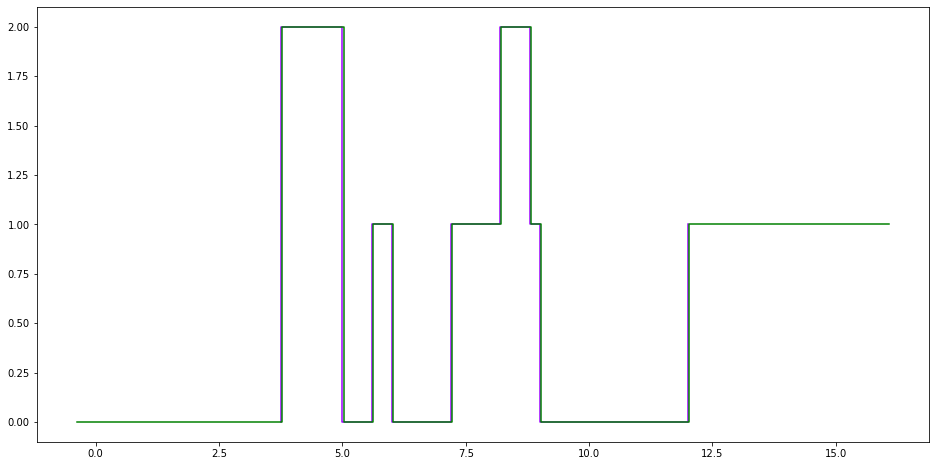

In [10]:
ax = (ss3+y2).plot()
(ss3+y2).plot(method='function',ax=ax,color='g',ts_grain=0.05)

In [11]:
print(queue.integrate(),queue.mean(),queue.var(),queue.mode(),queue.median(),queue.min(),queue.max(),queue.percentile(50),queue.percentile(37))
print(vsteps.integrate(),vsteps.mean(),vsteps.var(),vsteps.mode(), vsteps.median(),vsteps.min(),vsteps.max(),vsteps.percentile(50),vsteps.percentile(37))

67562.46666666854 7.721851302262628 23.43196238869643 0 7.0 0 23 7.0 6.0
67562.4666666666 7.7218513022624045 23.431962388696526 6.0 7.0 0.0 23.0 7.0 6.0


<AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>

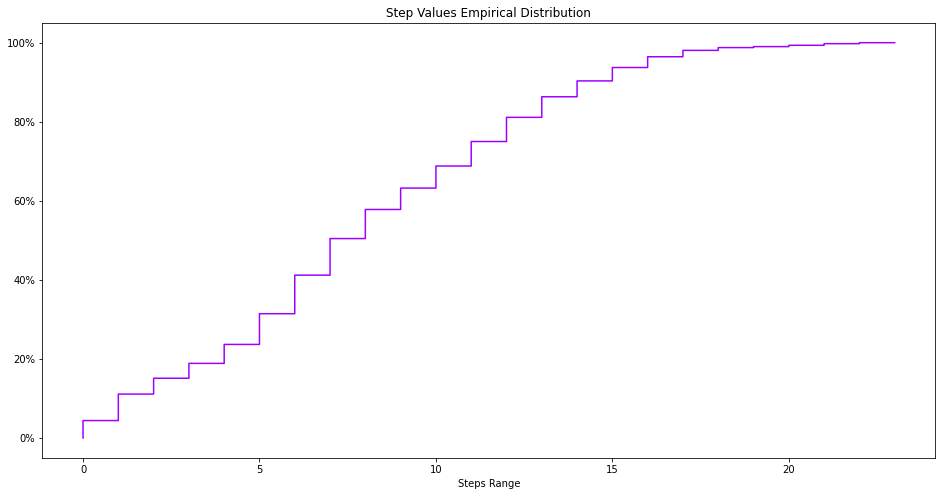

In [12]:
vsteps.ecdf_plot()